# Car Sales Data Analysis
### Exploratory Data Analysis using Python


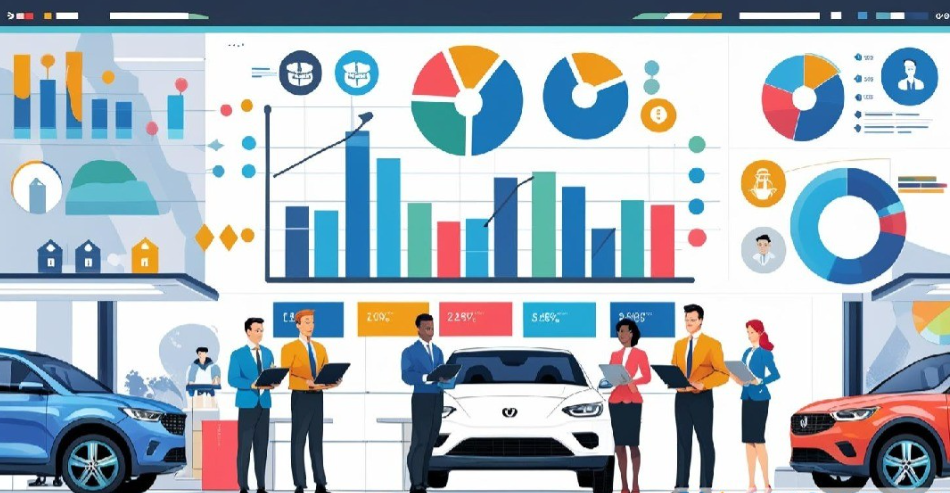

### Problem Statement
- The objective of this project is to analyze car sales data to understand 
sales trends, revenue distribution, and key business insights using Python.
- Best Company with respect to numbers of sales and revenue
- Relationship between annual salary and price of car
- Target customers on the basis of revenue and number of purchasing cars

### Dataset Overview
The dataset contains transactional car sales data with the following key attributes:
- Customer details (Gender, Annual Income)
- Car information (Company, Model, Transmission, Price)
- Sales information (Date, Dealer, Region)

Each row represents one car purchase.


### IMPORT LIBARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### READ THE DATA

In [55]:
df = pd.read_csv(r"C:\Users\deepa\Desktop\python project\Car Sales.xlsx - car_data.csv")
df.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [56]:
df.shape

(23906, 16)

In [48]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Month_Name'],
      dtype='object')

### Data Cleaning & Preprocessing

#### CHECKING DUPLICATES ROWS

In [53]:
df.duplicated().sum()

np.int64(0)

#### MISSING DATA

In [54]:
df.isna().sum()
# THERE IS 1 MISSING DATA IN CUSTOMER NAME 

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

##### HANDLE MISSING VALUE

In [8]:
df["Customer Name"].isnull().sum()

np.int64(1)

In [9]:
# MISSING DATA IN PERCENTAGE 
df["Customer Name"].isna().mean()*100

np.float64(0.004183050280264369)

In [10]:
# FIND THE ROW OF MISSING DATA
df[df["Customer Name"].isnull()]

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
7564,C_CND_007565,11/5/2022,NaN,Male,680000,Saab-Belle Dodge,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45000,60504-7114,Hardtop,7203103,Aurora


### DROP THE ROW (BECAUSE STILL WE HAVE LARGE DATASET)

In [11]:
df.drop(index=7564,inplace=True)

In [12]:
df["Customer Name"].isnull().sum()

np.int64(0)

#### CHANGE THE DATATYPE OF DATE COLUMN

In [57]:
df.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [13]:
df["Date"] = pd.to_datetime (df["Date"],errors="coerce")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

In [15]:
df.isna().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [16]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


#### SHOW DISTINCT CAR_COMPANIES

In [17]:
df["Company"].unique()

array(['Ford', 'Dodge', 'Cadillac', 'Toyota', 'Acura', 'Mitsubishi',
       'Chevrolet', 'Nissan', 'Mercury', 'BMW', 'Chrysler', 'Subaru',
       'Hyundai', 'Honda', 'Infiniti', 'Audi', 'Porsche', 'Volkswagen',
       'Buick', 'Saturn', 'Mercedes-B', 'Jaguar', 'Volvo', 'Pontiac',
       'Lincoln', 'Oldsmobile', 'Lexus', 'Plymouth', 'Saab', 'Jeep'],
      dtype=object)

#### TOTAL NO's OF CAR_COMPANIES

In [18]:
df["Company"].nunique()

30

#### TOP 10 COMPANIES ON THE BASIS OF SOLD_VOLUME

In [19]:
top_companies = df['Company'].value_counts().head(10)
top_companies


Company
Chevrolet     1819
Dodge         1670
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Name: count, dtype: int64

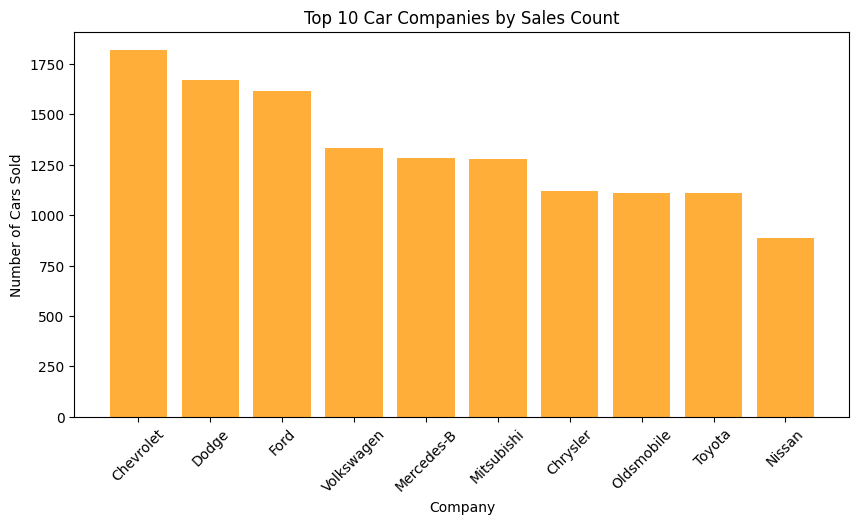

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(top_companies.index, top_companies.values,color = "#FFAE3A")

plt.xlabel("Company")
plt.ylabel("Number of Cars Sold")
plt.title("Top 10 Car Companies by Sales Count")
plt.xticks(rotation=45)

plt.show()


#### REVENUE OF EACH COMPANY

In [21]:
top_rev = df.groupby("Company")["Price ($)"].sum().reset_index(name="tot_rev").sort_values(by="tot_rev",ascending=False).head(10)
top_rev

,Company,tot_rev
5,Chevrolet,47655265
8,Ford,47231583
7,Dodge,44079996
20,Oldsmobile,35434512
16,Mercedes-B,34624123
28,Volkswagen,34082881
18,Mitsubishi,34062466
27,Toyota,32759564
6,Chrysler,29141873
14,Lexus,27287703


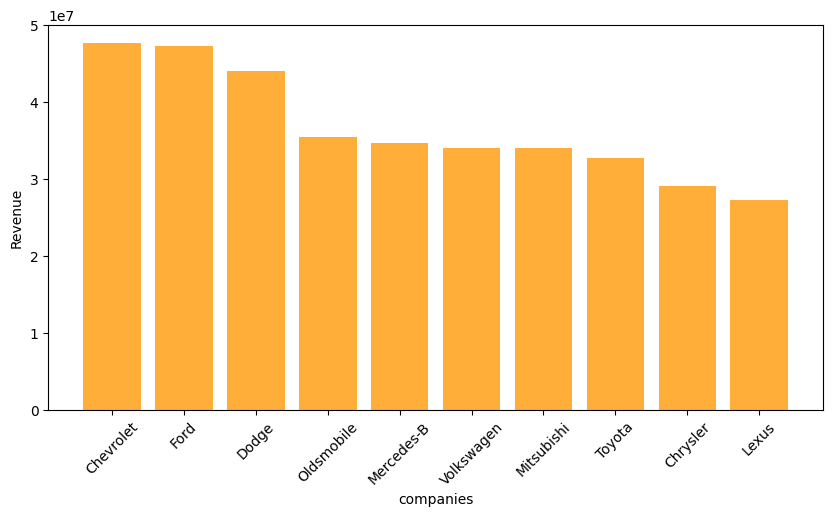

In [22]:
plt.figure(figsize=(10,5))
plt.bar(x= top_rev["Company"],height=top_rev["tot_rev"],color = "#ffae3a")
plt.xlabel("companies")
plt.ylabel("Revenue")
plt.xticks(rotation = 45)
plt.show()

##### INSIGHT
- Chevrolet is the only company who sold the maximum numbers of cars &
- Revenue is also high as compared with other company .

##### MOST SOLD MODELS 

In [23]:
max_sold_model = df.groupby(["Company","Model"]).size().reset_index(name="Total_sales").sort_values(by="Total_sales",ascending=False
                                                                                   ).head(10)
max_sold_model

,Company,Model,Total_sales
94,Mitsubishi,Diamante,418
112,Oldsmobile,Silhouette,411
26,Chevrolet,Prizm,411
148,Volkswagen,Passat,391
40,Dodge,Ram Pickup,382
147,Volkswagen,Jetta,382
1,Acura,RL,372
72,Lexus,LS400,354
30,Chrysler,LHS,330
4,Audi,A6,329


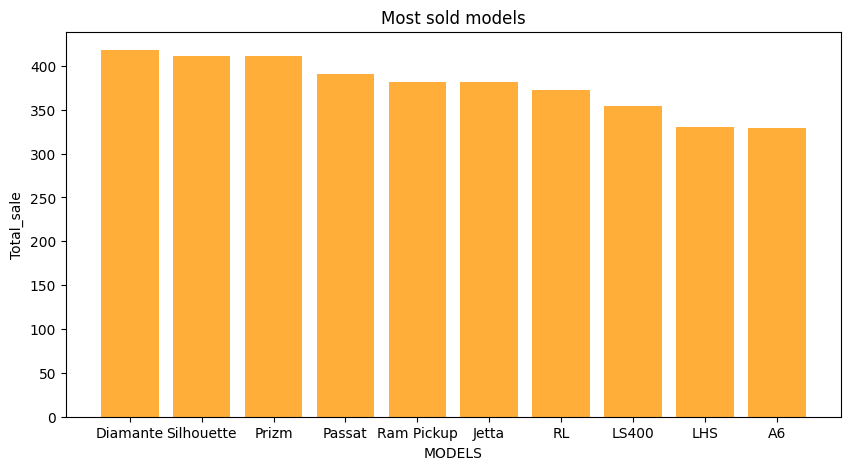

In [24]:
plt.figure(figsize=(10,5))
plt.bar(x=max_sold_model["Model"],height=max_sold_model["Total_sales"],color = "#ffae3a")
plt.xlabel("MODELS")
plt.ylabel("Total_sale")
plt.title("Most sold models")
plt.show()

##### CAR_PURCHASE ON THE BASIS OF GENDER

In [25]:
GENDER = df["Gender"].value_counts()
GENDER

Gender
Male      18797
Female     5108
Name: count, dtype: int64

#### AVERAGE SALARY (GENDER)

In [26]:
average_salary_comparsion = round(df.groupby("Gender")["Annual Income"].mean(),2)
average_salary_comparsion

Gender
Female    755973.02
Male      851193.15
Name: Annual Income, dtype: float64

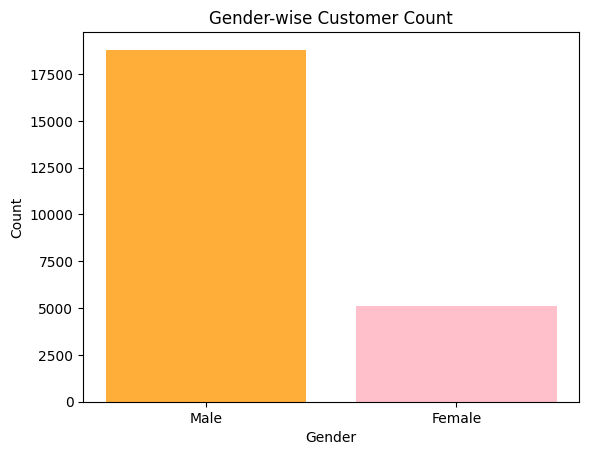

In [27]:
import matplotlib.pyplot as plt

plt.bar(GENDER.index, GENDER.values, color=['#ffae3a','pink'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender-wise Customer Count")
plt.show()


##### INSIGHT
- Males are buying more cars as compared with females.
- Average salary of females are less than males that's why females are purchasing less cars.

#### MOST POPULAR BODY TYPE

In [28]:
body_type = df["Body Style"].value_counts()
body_type

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2970
Name: count, dtype: int64

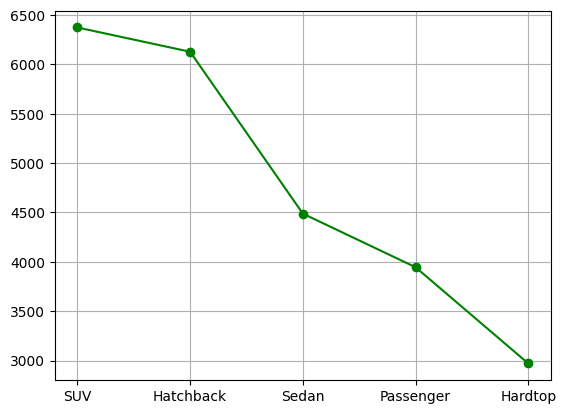

In [29]:
import matplotlib.pyplot as plt
plt.plot(body_type.index,body_type.values,marker = "o",color = "g")
plt.grid()
plt.show()

#### MOST FAVOURITE COLOUR OF THE CUSTOMERS

In [30]:
colour = df["Color"].value_counts()
colour

Color
Pale White    11255
Black          7857
Red            4793
Name: count, dtype: int64

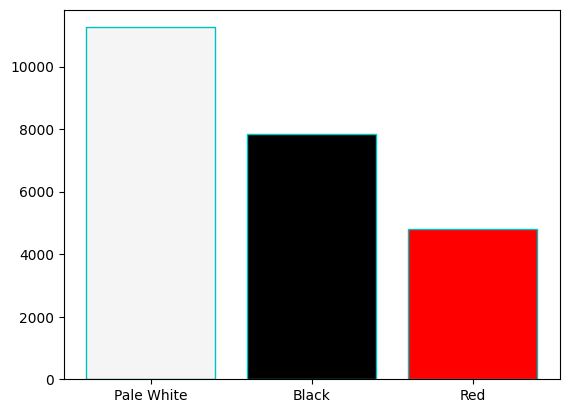

In [31]:
import matplotlib.pyplot as plt
plt.bar(colour.index,colour.values,color = ["#F5F5F5","k","r"],edgecolor = "c")
plt.show()

## Descriptive Statistics
Basic statistics were analyzed to understand income and car price distribution.


In [32]:
df[["Annual Income","Price ($)"]].describe()

,Annual Income,Price ($)
count,2.390500e+04,23905.000000
mean,8.308466e+05,28089.540473
std,7.200208e+05,14788.592495
min,1.008000e+04,1200.000000
25%,3.860000e+05,18001.000000
50%,7.350000e+05,23000.000000
75%,1.176000e+06,34000.000000
max,1.120000e+07,85800.000000


In [33]:
corr = df["Annual Income"].corr(df["Price ($)"])
print("Correlation:", corr)


Correlation: 0.01207532189820143


##### INSIGHT
- Correlation is close to zero, indicating no strong linear relationship
- Car purchase decisions are influenced by factors beyond income


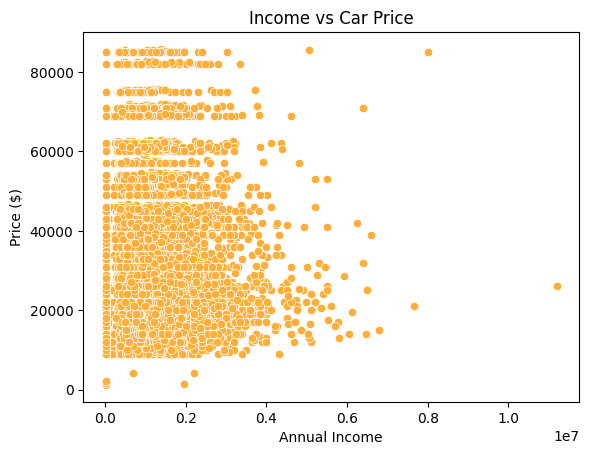

In [34]:
sns.scatterplot(x='Annual Income', y='Price ($)', data=df,color = "#ffae3a")
plt.title("Income vs Car Price")
plt.show()


##### INSIGHT
- Customer income varies widely indicating diverse purchasing power
- Presence of high-value outliers suggests luxury car buyers
- Salary does not depend on buying car price, even low annual salary customers also purchase high price cars
- From this graph we analysis that rich person also buying low cost cars(exception cases)

##### TRANSMISSION 

In [35]:
transmission = df["Transmission"].value_counts()
transmission

Transmission
Auto      12570
Manual    11335
Name: count, dtype: int64

Text(0.5, 1.0, 'Auto Transmission VS Manual')

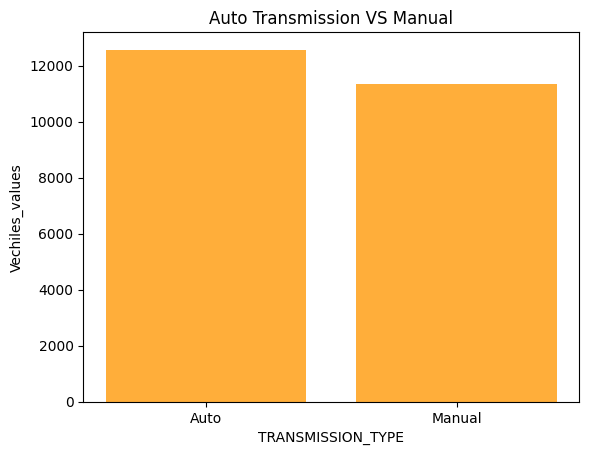

In [36]:
plt.bar(transmission.index,transmission.values,color = "#ffae3a")
plt.xlabel("TRANSMISSION_TYPE")
plt.ylabel("Vechiles_values")
plt.title("Auto Transmission VS Manual")

In [37]:
tr_gender = df.groupby(["Gender","Transmission"]).size()
tr_gender

Gender  Transmission
Female  Auto            2699
        Manual          2409
Male    Auto            9871
        Manual          8926
dtype: int64

##### INSIGHT
- Automatic transmission vehicles are slightly more popular than manual
- Both male and female like the auto transmission as compare to manual .

##### BEST REGION 

In [38]:
best_region = df["Dealer_Region"].value_counts()
best_region

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3129
Greenville    3128
Middletown    3128
Name: count, dtype: int64

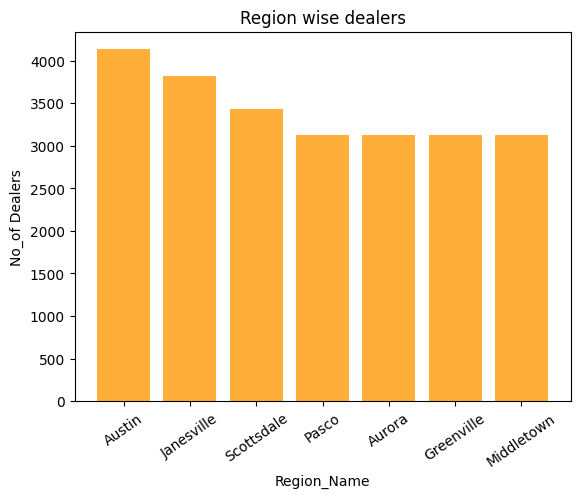

In [39]:
plt.bar(best_region.index,best_region.values,color = "#ffae3a")
plt.xlabel("Region_Name")
plt.ylabel("No_of Dealers")
plt.title("Region wise dealers")
plt.xticks(rotation = 35)
plt.show()

#### CUSTOMER WHO HAVE MORE THAN 1 CAR

In [40]:
Repeat_cust=(df.groupby("Customer Name").size().reset_index(name="total_cars").query("total_cars > 1")).sort_values(by="total_cars",ascending=False)#.head(10)
Repeat_cust


,Customer Name,total_cars
2768,Thomas,92
862,Emma,90
1790,Lucas,88
2209,Nathan,80
1778,Louis,76
...,...,...
148,Alycia,2
2818,Ugo,2
2819,Ulysse,2
111,Alexandria,2


In [65]:
df.groupby(["Customer Name","Gender"])["Price ($)"].sum().sort_values(ascending=False)

Customer Name  Gender
Emma           Male      2276369
Lucas          Male      2099631
Thomas         Male      2069474
Lea            Male      1685024
Alexis         Male      1666063
                          ...   
Chlotilde      Female       9000
Blanche        Male         9000
Aubree         Female       9000
Sammy          Female       4200
Oweis          Male         2200
Name: Price ($), Length: 4473, dtype: int64

### INSIGHT
- Many customers have more than one car.
- There are 1853 customers who have the multiples cars.
- Thomas is the customer who have a maximum numbers of cars but if we see w.r.t of total price Emma is the customer with total maximum price ($) 

##### MONTH_WISE CAR_SOLD VOLUME

In [58]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [41]:
df['Month_Name'] = df['Date'].dt.month_name()


In [42]:
monthly_12 = (
    df.groupby('Month_Name')
      .size()
      .reset_index(name='Cars_Sold')
      .sort_values("Cars_Sold")
)

monthly_12


,Month_Name,Cars_Sold
3,February,735
4,January,790
7,March,1535
0,April,1655
1,August,1705
6,June,1715
5,July,1725
10,October,1830
8,May,1895
11,September,3305


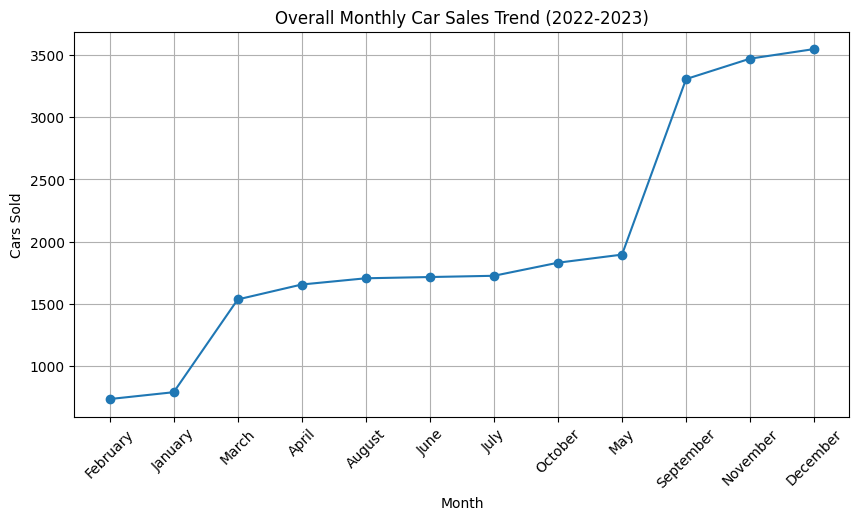

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_12['Month_Name'], monthly_12['Cars_Sold'], marker='o')

plt.xlabel("Month")
plt.ylabel("Cars Sold")
plt.title("Overall Monthly Car Sales Trend (2022-2023)")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


##### INSIGHT
- In December maximum numbers of cars sold out.
- In februray month very less volume of cars sold.
- From april to may there is no more flucation in volume .

##### TOTAL REVENUE MONTH_WISE

In [44]:
df['Month_Name'] = df['Date'].dt.month_name()


In [45]:
monthly_revenue_12 = (
    df.groupby('Month_Name')['Price ($)']
      .sum()
      .reset_index(name='Total_Revenue').sort_values("Total_Revenue",ascending=True)
)
monthly_revenue_12

,Month_Name,Total_Revenue
3,February,20643945
4,January,21696218
7,March,41705873
0,April,46864434
5,July,48178032
6,June,48505902
1,August,48793638
10,October,52035265
8,May,53221243
11,September,93635178


##### INSIGHT
- Certain brands dominate both sales volume and revenue
- High sales volume does not always mean highest revenue


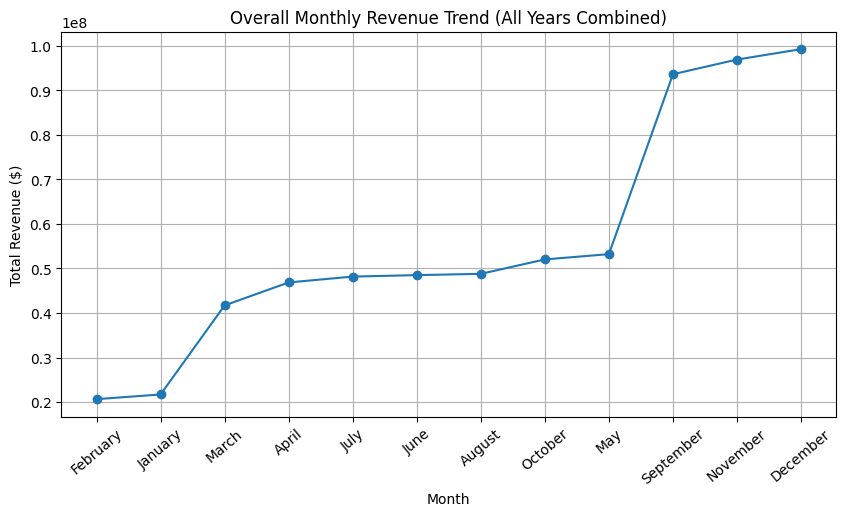

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(
    monthly_revenue_12['Month_Name'],
    monthly_revenue_12['Total_Revenue'],
    marker='o'
)

plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Overall Monthly Revenue Trend (All Years Combined)")
plt.xticks(rotation=40)
plt.grid(True)

plt.show()


## Conclusion
- Income alone does not strongly influence car purchase price
- Male customers contribute the majority of sales
- Automatic transmission vehicles are more preferred
- Strong seasonality exists in monthly sales and revenue
- Chevrolet is the company who sold max cars and their revenue is also high.
- Pale white is most favourite colours of customers, so focus on manufacturing of pale white colour car than other cars .